In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
# Functions to Profile

def fast_func():
    time.sleep(random.uniform(0.01, 0.015))

def slow_func():
    time.sleep(random.uniform(0.015, 0.020))

In [2]:
def fixed_iterations_test(function1, function2, iterations: int=100):
    '''
    Produces profiling report on the performance of 2 functions
    with the given number of iterations run
    '''

    runtimes_1 = np.array([], dtype=float)
    runtimes_2 = np.array([], dtype=float)

    for i in range(iterations):
        start_time = time.time()
        function1()
        runtimes_1 = np.append(runtimes_1, time.time() - start_time)

        start_time = time.time()
        function2()
        runtimes_2 = np.append(runtimes_2, time.time() - start_time)
        if i % 10 == 0:
            print('running')

    plt.hist(runtimes_1, bins=10, alpha=0.5, label='fast')
    plt.hist(runtimes_2, bins=10, alpha=0.5, label='slow')
    plt.xlabel('Run Time', size=14)
    plt.ylabel("Count", size=14)
    plt.title("Performance of Vanilla PyMongo vs PySpark & PyMongo")
    plt.legend(loc='upper right')

running
running
running
running
running
running
running
running
running
running


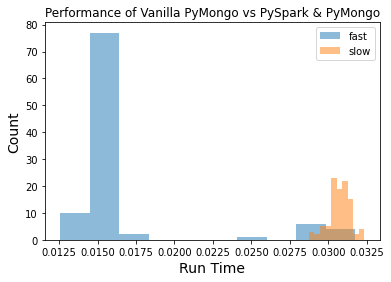

In [3]:
fixed_iterations_test(fast_func, slow_func)

In [4]:
def fixed_time_test(function1, function2, runtime_s: int=2):
    '''
    Produces profiling report on the performance of 2 functions
    with the given amount of time to run
    '''

    function1_iters = 0
    function2_iters = 0

    timeout_start = time.time()

    while time.time() < timeout_start + runtime_s:
        function1()
        function1_iters+=1

    timeout_start = time.time()

    while time.time() < timeout_start + runtime_s:
        function2()
        function2_iters+=1

    plt.bar(x=['Mongo', 'Spark'], height=[function1_iters, function2_iters])
    plt.xlabel('Technology', size=14)
    plt.ylabel(f'Iterations in {runtime_s} seconds', size=14)
    plt.title('Performance of Mongo vs Spark')

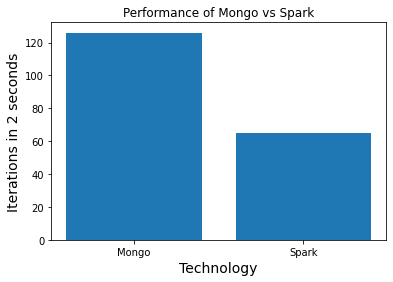

In [5]:
fixed_time_test(fast_func, slow_func)
# plt.bar(x=['a', 'b'], height=[1,2])

[2513729971]


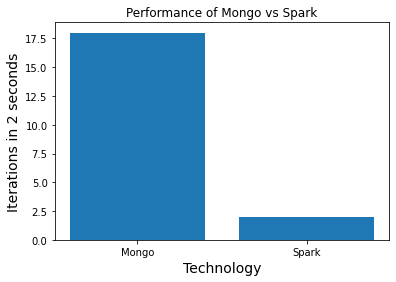

In [6]:
from mongo_queries import MongoSearch
from spark_queries import SparkQuery

MG = MongoSearch()
SQ = SparkQuery()

print(SQ.randomUsersIds())

fixed_time_test(MG.randomUsersIds, SQ.randomUsersIds, 2)

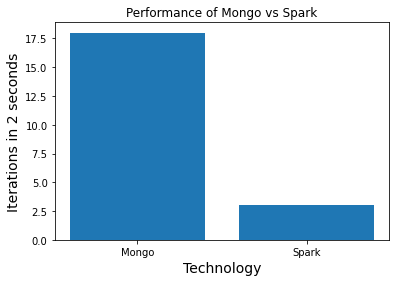

In [7]:
fixed_time_test(MG.randomUsersIds, SQ.randomUsersIds, 2)

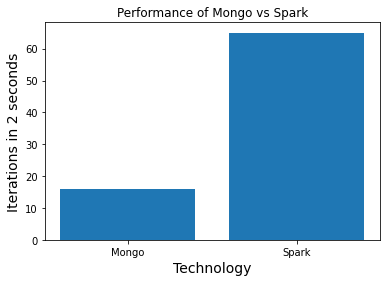

In [8]:

fixed_time_test(MG.randomUsersIds, slow_func)
# plt.bar(x=['a', 'b'], height=[1,2])